In [1]:
import numpy as np
from keras.layers import Embedding, SimpleRNN, Dense, LSTM
from keras.models import Sequential
from keras.datasets import imdb
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [3]:
max_features = 10000 #aka max no. of words
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(input_train.shape, input_test.shape)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print(input_train.shape, input_test.shape)

17465344/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)
(25000, 500) (25000, 500)


In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 23s 147ms/step - loss: 0.6537 - acc: 0.5985 - val_loss: 0.5105 - val_acc: 0.7560
Epoch 2/10
157/157 [==============================] - 22s 142ms/step - loss: 0.4117 - acc: 0.8206 - val_loss: 0.4215 - val_acc: 0.8122
Epoch 3/10
157/157 [==============================] - 23s 143ms/step - loss: 0.2950 - acc: 0.8798 - val_loss: 0.3906 - val_acc: 0.8294
Epoch 4/10
157/157 [==============================] - 22s 140ms/step - loss: 0.2263 - acc: 0.9129 - val_loss: 0.4182 - val_acc: 0.8134
Epoch 5/10
157/157 [==============================] - 22s 141ms/step - loss: 0.1540 - acc: 0.9451 - val_loss: 0.4214 - val_acc: 0.8340
Epoch 6/10
157/157 [==============================] - 22s 141ms/step - loss: 0.1210 - acc: 0.9564 - val_loss: 0.5046 - val_acc: 0.7980
Epoch 7/10
157/157 [==============================] - 22s 141ms/step - loss: 0.0713 - acc: 0.9780 - val_loss: 0.7575 - val_acc: 0.7246
Epoch 8/10
157/157 [==============================] - 2

In [6]:
def plot_metrics(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

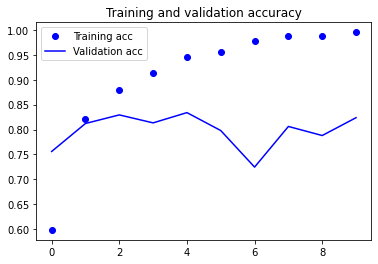

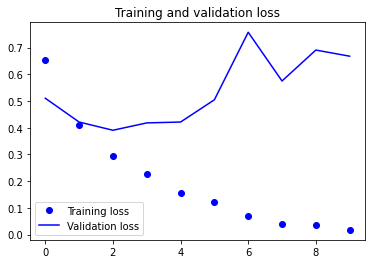

In [7]:
plot_metrics(history)

In [9]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 52s 331ms/step - loss: 0.4774 - acc: 0.7771 - val_loss: 0.3743 - val_acc: 0.8456
Epoch 2/10
157/157 [==============================] - 55s 353ms/step - loss: 0.2839 - acc: 0.8907 - val_loss: 0.7620 - val_acc: 0.7930
Epoch 3/10
157/157 [==============================] - 55s 349ms/step - loss: 0.2318 - acc: 0.9119 - val_loss: 0.3115 - val_acc: 0.8858
Epoch 4/10
157/157 [==============================] - 55s 349ms/step - loss: 0.1938 - acc: 0.9281 - val_loss: 0.6318 - val_acc: 0.8212
Epoch 5/10
157/157 [==============================] - 55s 349ms/step - loss: 0.1780 - acc: 0.9376 - val_loss: 0.2898 - val_acc: 0.8842
Epoch 6/10
157/157 [==============================] - 55s 349ms/step - loss: 0.1533 - acc: 0.9456 - val_loss: 0.3058 - val_acc: 0.8890
Epoch 7/10
157/157 [==============================] - 55s 349ms/step - loss: 0.1371 - acc: 0.9516 - val_loss: 0.3902 - val_acc: 0.8746
Epoch 8/10
157/157 [==============================] - 5

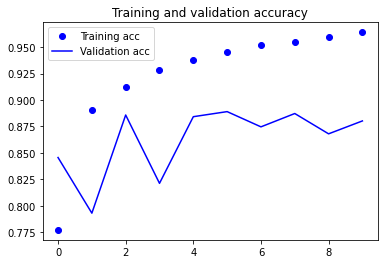

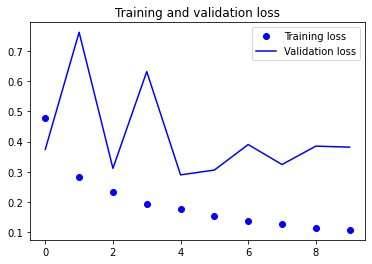

In [10]:
plot_metrics(history)